In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from itertools import chain
from model.SVD_Label import SVD_Label
from model.NMF_Label import NMF_Label
from model.WE_Label import WE_Label

# Setting 

In [2]:
FD_DATA = './data/'
FD_WEIGHT = './weight/'
FN_DATA = FD_DATA + 'data_sample.csv'
# FN_WEIGHT = FD_WEIGHT + 'weight_SVD.p'
# FN_WEIGHT = FD_WEIGHT + 'weight_NMF.p'
FN_WEIGHT = FD_WEIGHT + 'weight_WE.p'

# Load Data

In [3]:
df = pd.read_csv(FN_DATA, encoding='latin-1')
N = df.shape[0]

# Map label to label description 
map_l2d = dict(df.groupby(by='LABEL')['LABEL_DESC'].first().reset_index().values.tolist())

df.columns, N

(Index(['DESC', 'LABEL', 'LABEL_DESC'], dtype='object'), 9327)

# Prepare data

In [4]:
universe_desc = set(chain.from_iterable(df.DESC.str.split().values))
universe_label = set(df.LABEL.values)

x = df.DESC.str.split().values
y = df.LABEL.values

# Train SVD Labeller

Explained variance: 0.9997266241547151
train acc 0.8007933955183875


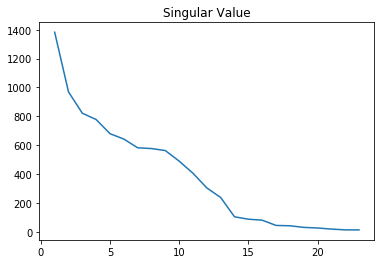

In [8]:
param_optim = {'n_components': 23}

# Create model
model = SVD_Label(**param_optim)

# Build
model.build(universe_x=universe_desc, universe_y=universe_label)

# Compile
model.compile()

# Fit
model.fit(x, y, verbose=True)

# Save
model.save_model(FN_WEIGHT)

# Load
model.load_model(FN_WEIGHT)

# Inference
y_pred = model.predict(x)

# Evaluate
perc_match = (y_pred == y).sum() / y.shape[0]
print('train acc {}'.format(perc_match))


# Train NMF Labeller

In [10]:
param_optim = {'n_components': 70}

# Create model
model = NMF_Label(**param_optim)

# Build
model.build(universe_x=universe_desc, universe_y=universe_label)

# Compile
model.compile()

# Fit
model.fit(x, y, verbose=True)

# Save
model.save_model(FN_WEIGHT)

# Load
model.load_model(FN_WEIGHT)

# Inference
y_pred = model.predict(x)

# Evaluate
perc_match = (y_pred == y).sum() / y.shape[0]
print('train acc {}'.format(perc_match))


Recon error: 14.343742026091002, Raw matrix norm: 1382.1798881565035
train acc 0.778278117293878


# Train WE Labeller

In [5]:
param_optim = {'embedding_size': 30,
               'num_sampled': 5}

# Create model
model = WE_Label(vocabulary_size=len(universe_desc),
                 label_size=len(universe_label),
                 embedding_size=param_optim['embedding_size'])

# Build
model.build(universe_x=universe_desc, universe_y=universe_label)

# Compile
model.compile(num_sampled=param_optim['num_sampled'])     # num_samples:   no. of negative samples in tf.nn.nce_loss


model.fit(x, y, verbose=True)

# Save
model.save_model(FN_WEIGHT)

# Load
model.load_model(FN_WEIGHT)

# Inference
y_pred = model.predict(x)

# Evaluate
perc_match = (y_pred == y).sum() / y.shape[0]
print('train acc {}'.format(perc_match))
        

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Initialized
Save BEST model at step 830 (0.531)..........] - ETA: 9:05 - loss: 2.2662 - val loss: 0.9275 - accuracy: 0.0312 - val accuracy: 0.0730  WARNING:tensorflow:From /home/kumamon/.conda/envs/dev/lib/python3.7/site-packages/tensorflow/python/training/saver.py:966: remove_checkpoint (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to delete files with this prefix.
 36800/100000 [==========>...................] - ETA: 4:53 - loss: 0.2203 - val loss: 0.6774 - accuracy: 0.8125 - val accuracy: 0.8584
Plateau reached.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./ckpt/WE_Label-6290

Reduce lr to 0.0005000000237487257
 58400/100000 [================>.............] - ETA: 3:11